# #ML-Mini-2 : Salary Estimation using K-Nearest Neighbor

### 1 - Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### 2 - Uploading the Dataset

In [2]:
dts = pd.read_csv("Salary.csv")
dts

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


### 3 - Summarizing the Dataset

In [3]:
dts.shape

(32561, 5)

In [4]:
dts.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

In [5]:
dts.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


### 4 - Mapping Salary Data to Binary Value

In [6]:
income_set = set(dts['income'])
dts['income'] = dts['income'].map({'<=50K':0, '>50K':1}).astype(int)
print(dts.head(15))

    age  education.num  capital.gain  hours.per.week  income
0    90              9             0              40       0
1    82              9             0              18       0
2    66             10             0              40       0
3    54              4             0              40       0
4    41             10             0              40       0
5    34              9             0              45       0
6    38              6             0              40       0
7    74             16             0              20       1
8    68              9             0              40       0
9    41             10             0              60       1
10   45             16             0              35       1
11   38             15             0              45       1
12   52             13             0              20       1
13   32             14             0              55       1
14   51             16             0              40       1


### 5  - Segregating Dataset into X [ Input / Independant Variable ] & Y [ Output / Dependant Variable ]

In [7]:
X = dts.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [8]:
Y = dts.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

### 6 - Splitting Dataset to Test & Train

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

### 7 - Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

### 8 - Finding the Best K-Value

Text(0, 0.5, 'Mean Error')

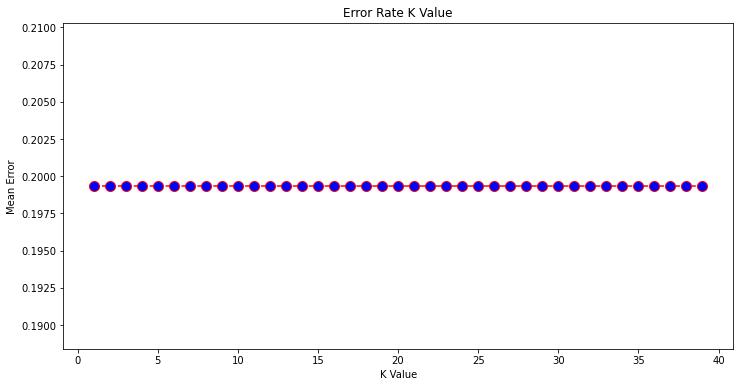

In [12]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K Values between 1 and 50
for i in range(1,40):
    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error Rate K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

### 9 - Training our Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 6, metric="minkowski", p=2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)